###Phase 2

In [4]:
import os
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
import seaborn as sns

In [5]:
# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# =====================================================
# CONFIGURATION (Update these paths)
# =====================================================
IMAGE_DIR = "/home/kavir/image_project/Images"
CAPTIONS_FILE = "/home/kavir/image_project/captions.txt"
SAVE_DIR = "eda_results"

if not os.path.exists(SAVE_DIR):
    os.makedirs(SAVE_DIR)

# =====================================================
# 1. LOAD AND PARSE CAPTIONS
# =====================================================
print("="*60)
print("LOADING DATA")
print("="*60)

LOADING DATA


In [6]:
# =====================================================
# 1. LOAD AND PARSE CAPTIONS
# =====================================================
print("="*60)
print("LOADING DATA")
print("="*60)

captions = {}
all_captions = []

with open(CAPTIONS_FILE, "r", encoding="utf-8") as f:
    for line in f:
        line = line.strip()
        if not line or line.startswith("image,caption"):
            continue
        
        parts = line.split(",", 1)
        if len(parts) < 2:
            continue
        
        img = parts[0].strip()
        cap = parts[1].strip()
        
        if not img or not cap:
            continue
        
        captions.setdefault(img, []).append(cap)
        all_captions.append(cap)

print(f"✓ Total images: {len(captions)}")
print(f"✓ Total captions: {len(all_captions)}")
print(f"✓ Average captions per image: {len(all_captions)/len(captions):.2f}")

LOADING DATA
✓ Total images: 8091
✓ Total captions: 40455
✓ Average captions per image: 5.00



IMAGE EXPLORATORY DATA ANALYSIS


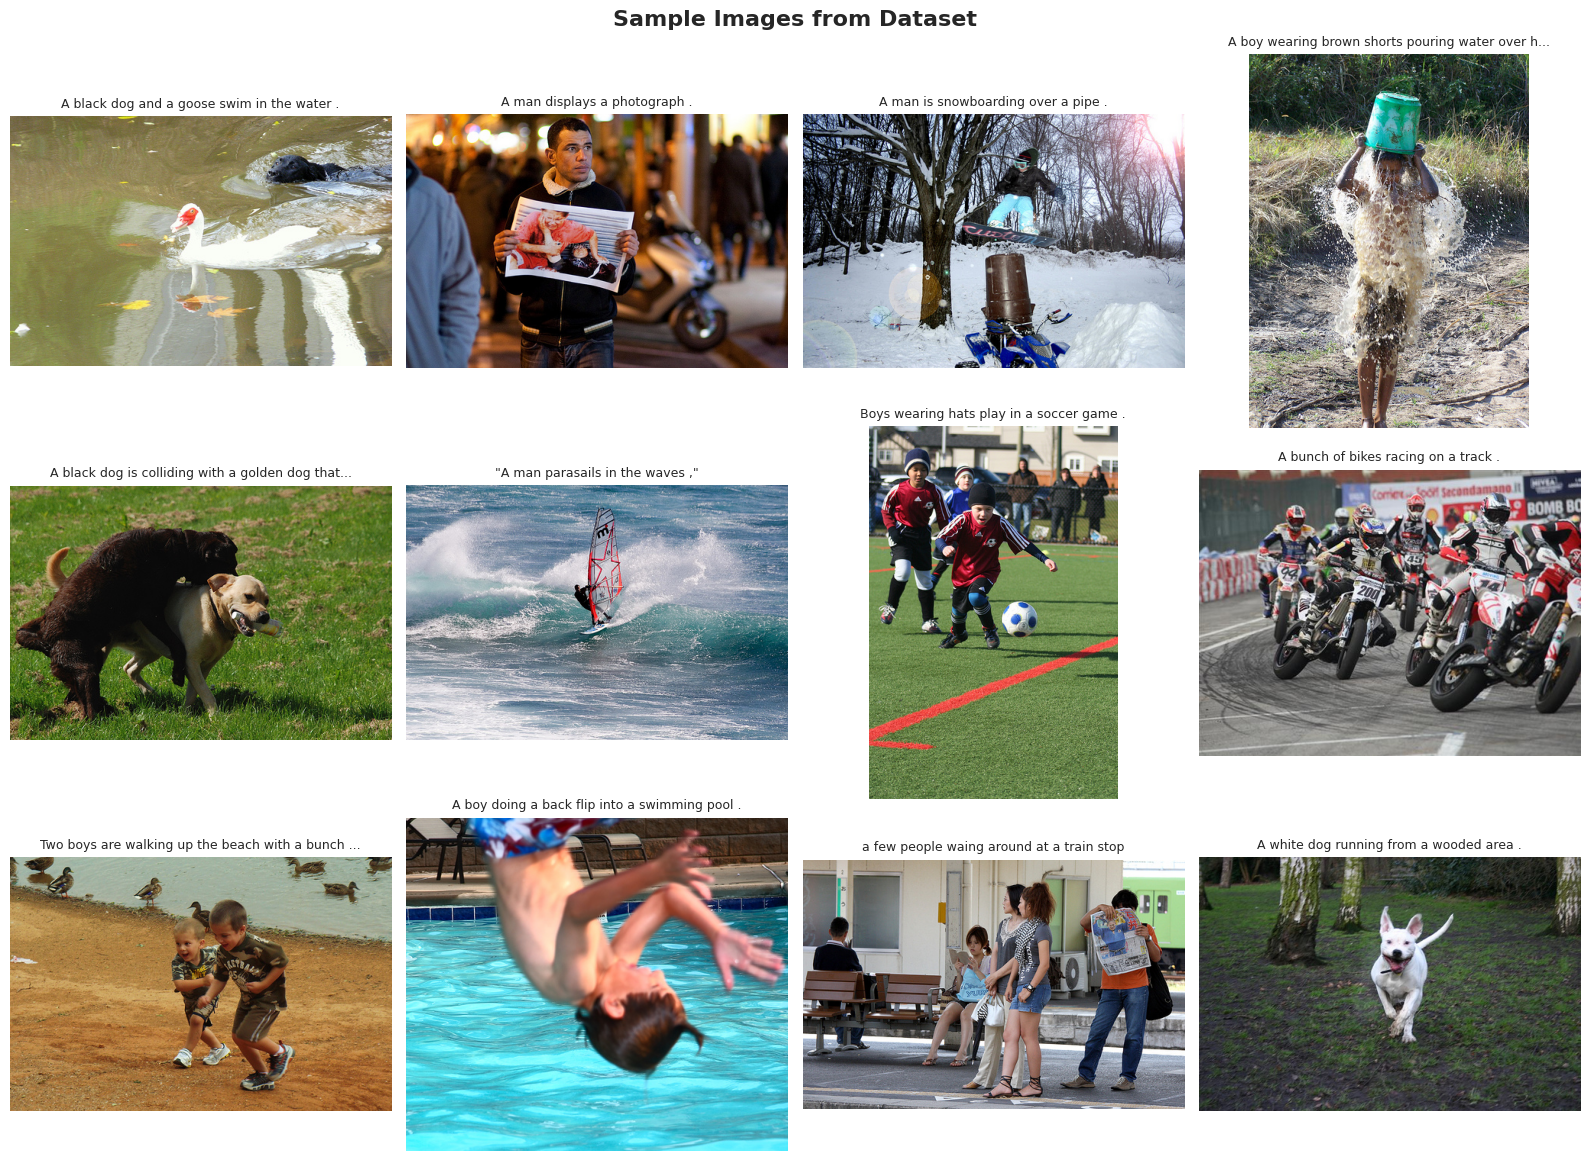


Analyzing image dimensions...


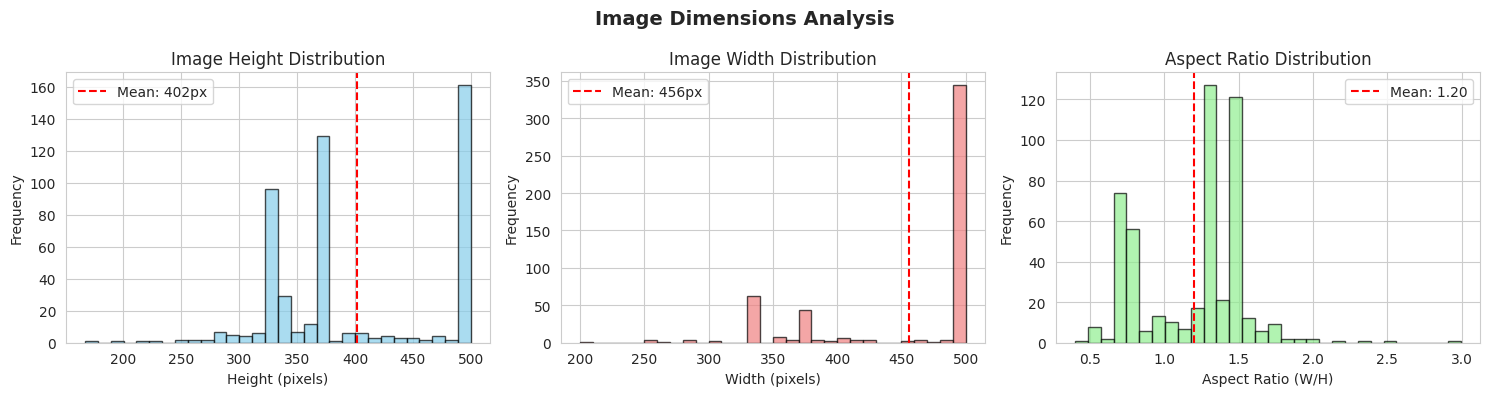

In [7]:
# =====================================================
# 2. IMAGE EDA
# =====================================================
print("\n" + "="*60)
print("IMAGE EXPLORATORY DATA ANALYSIS")
print("="*60)

# Sample random images and display
fig, axes = plt.subplots(3, 4, figsize=(16, 12))
fig.suptitle('Sample Images from Dataset', fontsize=16, fontweight='bold')

sample_images = random.sample(list(captions.keys()), min(12, len(captions)))

for idx, (ax, img_name) in enumerate(zip(axes.flat, sample_images)):
    img_path = os.path.join(IMAGE_DIR, img_name)
    if os.path.exists(img_path):
        img = plt.imread(img_path)
        ax.imshow(img)
        ax.axis('off')
        
        # Show first caption
        caption_text = captions[img_name][0]
        if len(caption_text) > 50:
            caption_text = caption_text[:47] + "..."
        ax.set_title(caption_text, fontsize=9, wrap=True)

plt.tight_layout()
plt.savefig(os.path.join(SAVE_DIR, "01_sample_images.png"), dpi=150, bbox_inches='tight')
plt.show()

# Image dimensions analysis
print("\nAnalyzing image dimensions...")
image_sizes = []
for img_name in list(captions.keys())[:500]:  # Sample 500 images
    img_path = os.path.join(IMAGE_DIR, img_name)
    if os.path.exists(img_path):
        img = plt.imread(img_path)
        image_sizes.append(img.shape[:2])

if image_sizes:
    heights, widths = zip(*image_sizes)
    
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))
    fig.suptitle('Image Dimensions Analysis', fontsize=14, fontweight='bold')
    
    # Height distribution
    axes[0].hist(heights, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    axes[0].set_xlabel('Height (pixels)')
    axes[0].set_ylabel('Frequency')
    axes[0].set_title('Image Height Distribution')
    axes[0].axvline(np.mean(heights), color='red', linestyle='--', label=f'Mean: {np.mean(heights):.0f}px')
    axes[0].legend()
    
    # Width distribution
    axes[1].hist(widths, bins=30, color='lightcoral', edgecolor='black', alpha=0.7)
    axes[1].set_xlabel('Width (pixels)')
    axes[1].set_ylabel('Frequency')
    axes[1].set_title('Image Width Distribution')
    axes[1].axvline(np.mean(widths), color='red', linestyle='--', label=f'Mean: {np.mean(widths):.0f}px')
    axes[1].legend()
    
    # Aspect ratio
    aspect_ratios = [w/h for h, w in image_sizes]
    axes[2].hist(aspect_ratios, bins=30, color='lightgreen', edgecolor='black', alpha=0.7)
    axes[2].set_xlabel('Aspect Ratio (W/H)')
    axes[2].set_ylabel('Frequency')
    axes[2].set_title('Aspect Ratio Distribution')
    axes[2].axvline(np.mean(aspect_ratios), color='red', linestyle='--', label=f'Mean: {np.mean(aspect_ratios):.2f}')
    axes[2].legend()
    
    plt.tight_layout()
    plt.savefig(os.path.join(SAVE_DIR, "02_image_dimensions.png"), dpi=150, bbox_inches='tight')
    plt.show()


CAPTION TEXT ANALYSIS
Caption Statistics:
  Min words: 1
  Max words: 38
  Mean words: 11.78
  Median words: 11


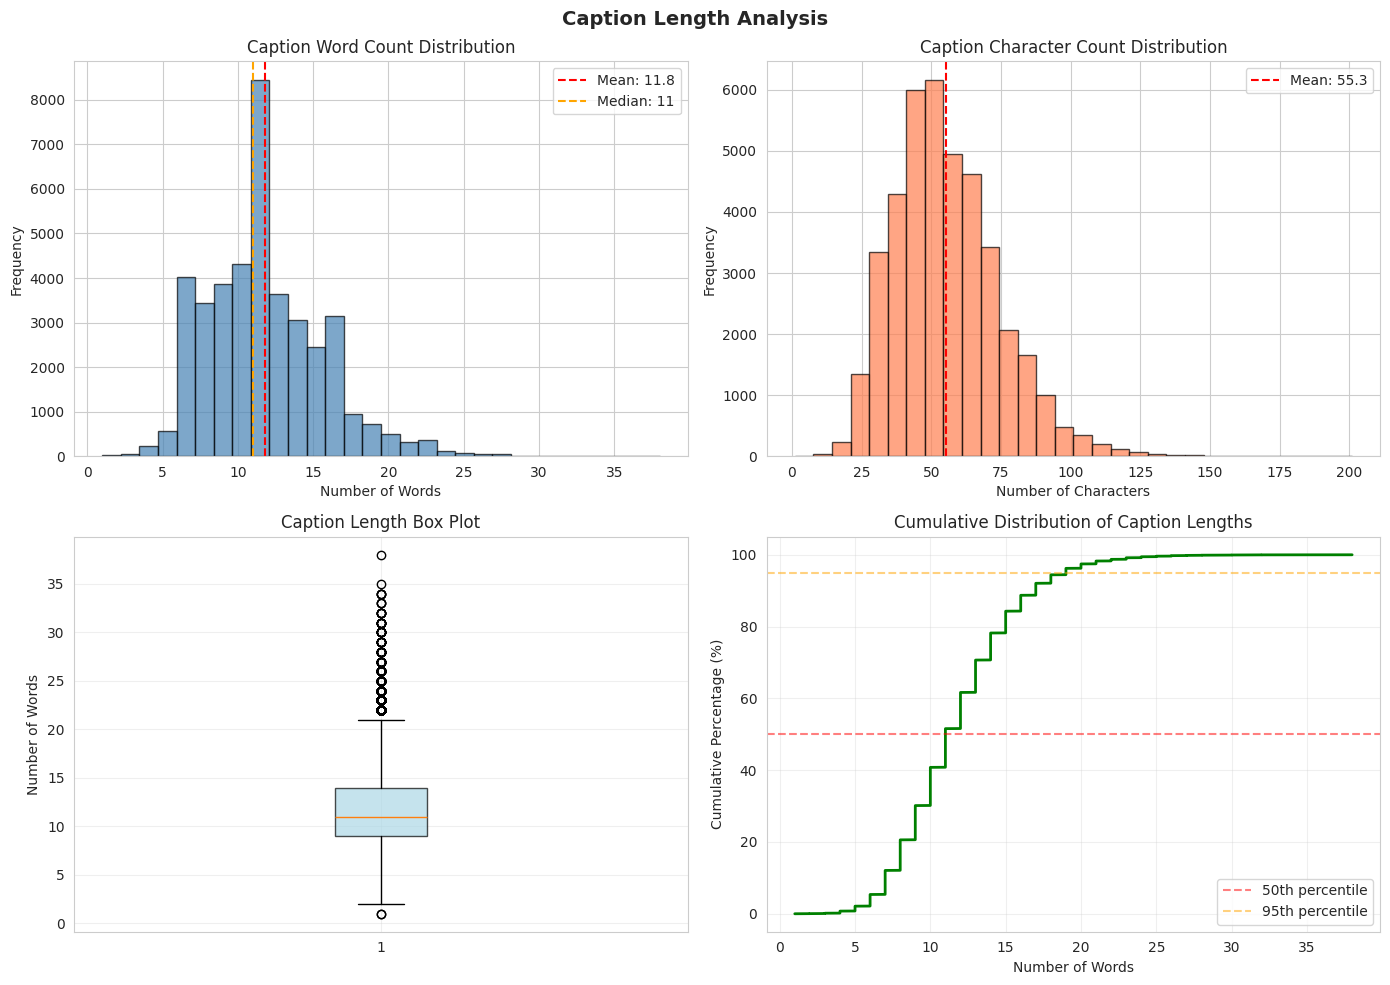

In [8]:
# =====================================================
# 3. CAPTION TEXT ANALYSIS
# =====================================================
print("\n" + "="*60)
print("CAPTION TEXT ANALYSIS")
print("="*60)

# Caption length analysis
caption_lengths = [len(cap.split()) for cap in all_captions]
caption_char_lengths = [len(cap) for cap in all_captions]

print(f"Caption Statistics:")
print(f"  Min words: {min(caption_lengths)}")
print(f"  Max words: {max(caption_lengths)}")
print(f"  Mean words: {np.mean(caption_lengths):.2f}")
print(f"  Median words: {np.median(caption_lengths):.0f}")

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Caption Length Analysis', fontsize=14, fontweight='bold')

# Word count distribution
axes[0, 0].hist(caption_lengths, bins=30, color='steelblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Number of Words')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Caption Word Count Distribution')
axes[0, 0].axvline(np.mean(caption_lengths), color='red', linestyle='--', 
                    label=f'Mean: {np.mean(caption_lengths):.1f}')
axes[0, 0].axvline(np.median(caption_lengths), color='orange', linestyle='--', 
                    label=f'Median: {np.median(caption_lengths):.0f}')
axes[0, 0].legend()

# Character count distribution
axes[0, 1].hist(caption_char_lengths, bins=30, color='coral', edgecolor='black', alpha=0.7)
axes[0, 1].set_xlabel('Number of Characters')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Caption Character Count Distribution')
axes[0, 1].axvline(np.mean(caption_char_lengths), color='red', linestyle='--', 
                    label=f'Mean: {np.mean(caption_char_lengths):.1f}')
axes[0, 1].legend()

# Box plot
axes[1, 0].boxplot(caption_lengths, vert=True, patch_artist=True,
                    boxprops=dict(facecolor='lightblue', alpha=0.7))
axes[1, 0].set_ylabel('Number of Words')
axes[1, 0].set_title('Caption Length Box Plot')
axes[1, 0].grid(True, alpha=0.3)

# Cumulative distribution
sorted_lengths = np.sort(caption_lengths)
cumulative = np.arange(1, len(sorted_lengths) + 1) / len(sorted_lengths) * 100
axes[1, 1].plot(sorted_lengths, cumulative, linewidth=2, color='green')
axes[1, 1].set_xlabel('Number of Words')
axes[1, 1].set_ylabel('Cumulative Percentage (%)')
axes[1, 1].set_title('Cumulative Distribution of Caption Lengths')
axes[1, 1].axhline(50, color='red', linestyle='--', alpha=0.5, label='50th percentile')
axes[1, 1].axhline(95, color='orange', linestyle='--', alpha=0.5, label='95th percentile')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(os.path.join(SAVE_DIR, "03_caption_length_analysis.png"), dpi=150, bbox_inches='tight')
plt.show()


VOCABULARY ANALYSIS
Vocabulary Statistics:
  Total words: 476,665
  Unique words: 9,180
  Average word frequency: 51.92


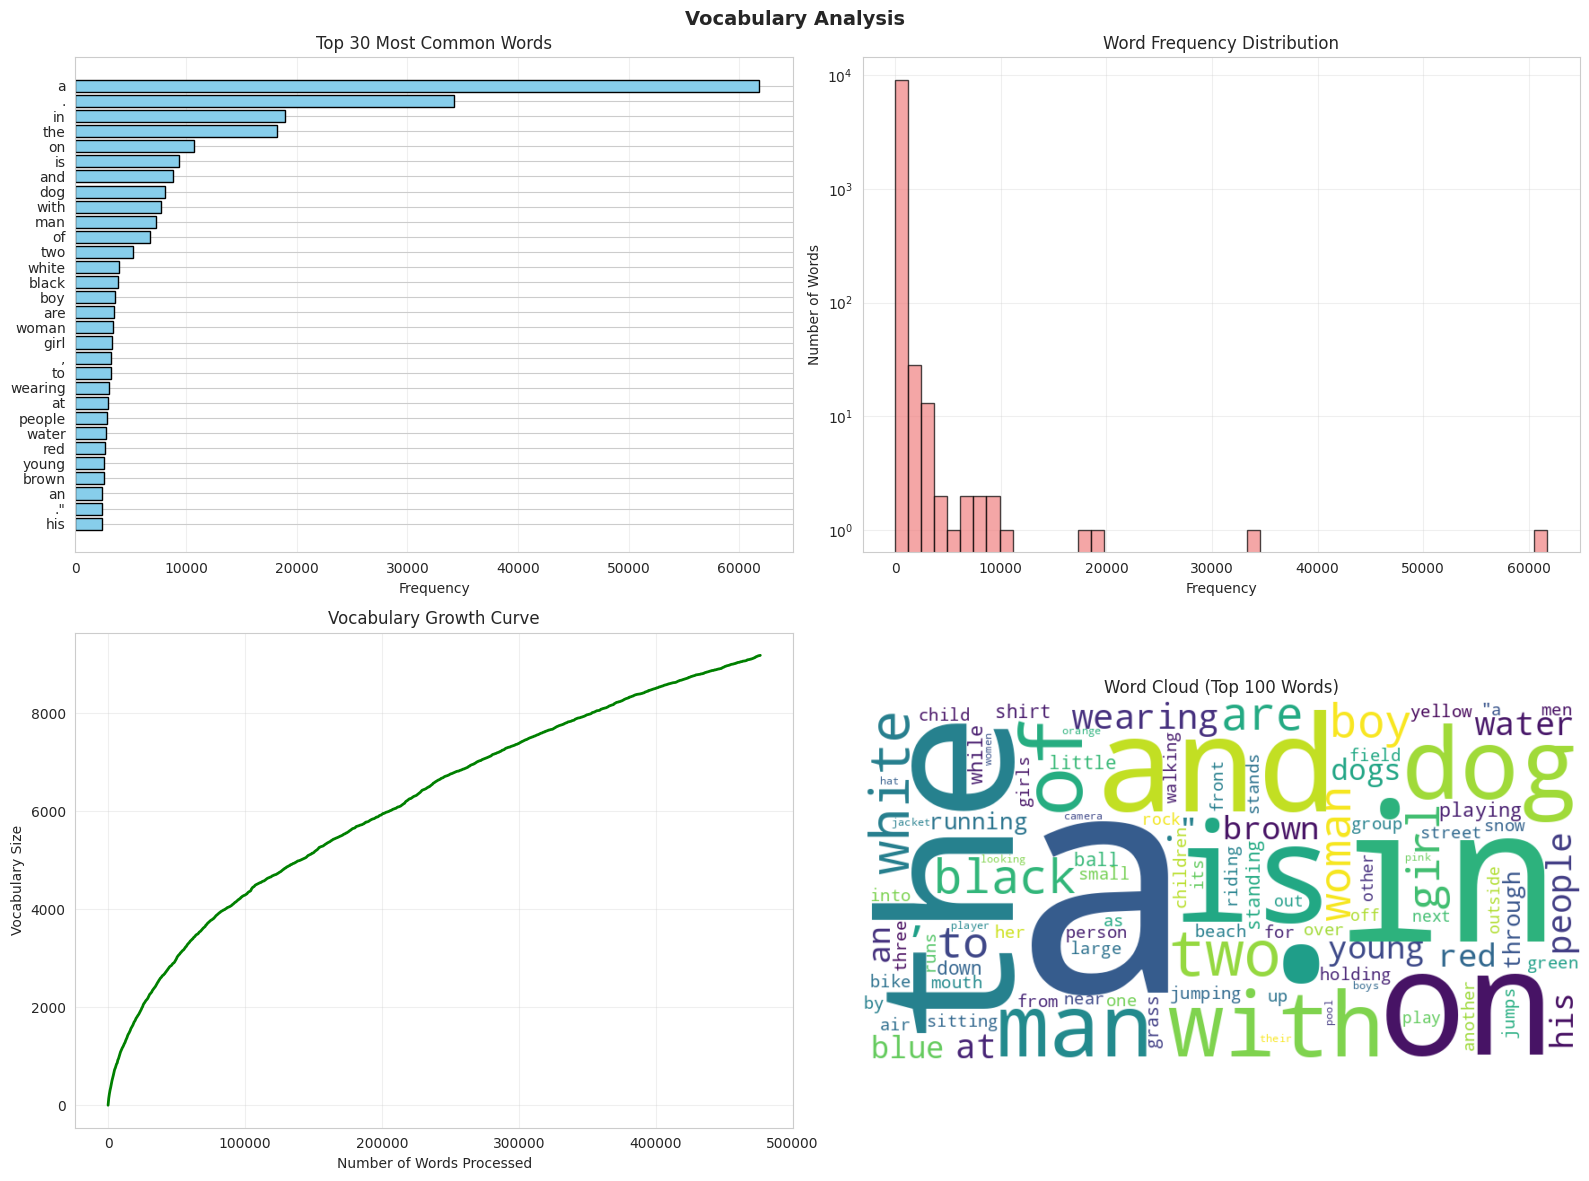

In [9]:
# =====================================================
# 4. VOCABULARY ANALYSIS
# =====================================================
print("\n" + "="*60)
print("VOCABULARY ANALYSIS")
print("="*60)

# Tokenize all captions
all_words = []
for cap in all_captions:
    words = cap.lower().split()
    all_words.extend(words)

word_freq = Counter(all_words)
unique_words = len(word_freq)
total_words = len(all_words)

print(f"Vocabulary Statistics:")
print(f"  Total words: {total_words:,}")
print(f"  Unique words: {unique_words:,}")
print(f"  Average word frequency: {total_words/unique_words:.2f}")

# Most common words
top_words = word_freq.most_common(30)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Vocabulary Analysis', fontsize=14, fontweight='bold')

# Top 30 words bar chart
words, counts = zip(*top_words)
axes[0, 0].barh(range(len(words)), counts, color='skyblue', edgecolor='black')
axes[0, 0].set_yticks(range(len(words)))
axes[0, 0].set_yticklabels(words)
axes[0, 0].invert_yaxis()
axes[0, 0].set_xlabel('Frequency')
axes[0, 0].set_title('Top 30 Most Common Words')
axes[0, 0].grid(True, alpha=0.3, axis='x')

# Word frequency distribution
freq_values = list(word_freq.values())
axes[0, 1].hist(freq_values, bins=50, color='lightcoral', edgecolor='black', alpha=0.7)
axes[0, 1].set_xlabel('Frequency')
axes[0, 1].set_ylabel('Number of Words')
axes[0, 1].set_title('Word Frequency Distribution')
axes[0, 1].set_yscale('log')
axes[0, 1].grid(True, alpha=0.3)

# Vocabulary growth curve
vocab_growth = []
unique_set = set()
for word in all_words:
    unique_set.add(word)
    vocab_growth.append(len(unique_set))

sample_indices = range(0, len(vocab_growth), max(1, len(vocab_growth)//1000))
sampled_growth = [vocab_growth[i] for i in sample_indices]

axes[1, 0].plot(list(sample_indices), sampled_growth, linewidth=2, color='green')
axes[1, 0].set_xlabel('Number of Words Processed')
axes[1, 0].set_ylabel('Vocabulary Size')
axes[1, 0].set_title('Vocabulary Growth Curve')
axes[1, 0].grid(True, alpha=0.3)

# Word cloud
try:
    wordcloud = WordCloud(width=800, height=400, background_color='white',
                          colormap='viridis', max_words=100).generate_from_frequencies(word_freq)
    axes[1, 1].imshow(wordcloud, interpolation='bilinear')
    axes[1, 1].axis('off')
    axes[1, 1].set_title('Word Cloud (Top 100 Words)')
except:
    axes[1, 1].text(0.5, 0.5, 'WordCloud not available\nInstall: pip install wordcloud',
                    ha='center', va='center', fontsize=12)
    axes[1, 1].axis('off')

plt.tight_layout()
plt.savefig(os.path.join(SAVE_DIR, "04_vocabulary_analysis.png"), dpi=150, bbox_inches='tight')
plt.show()

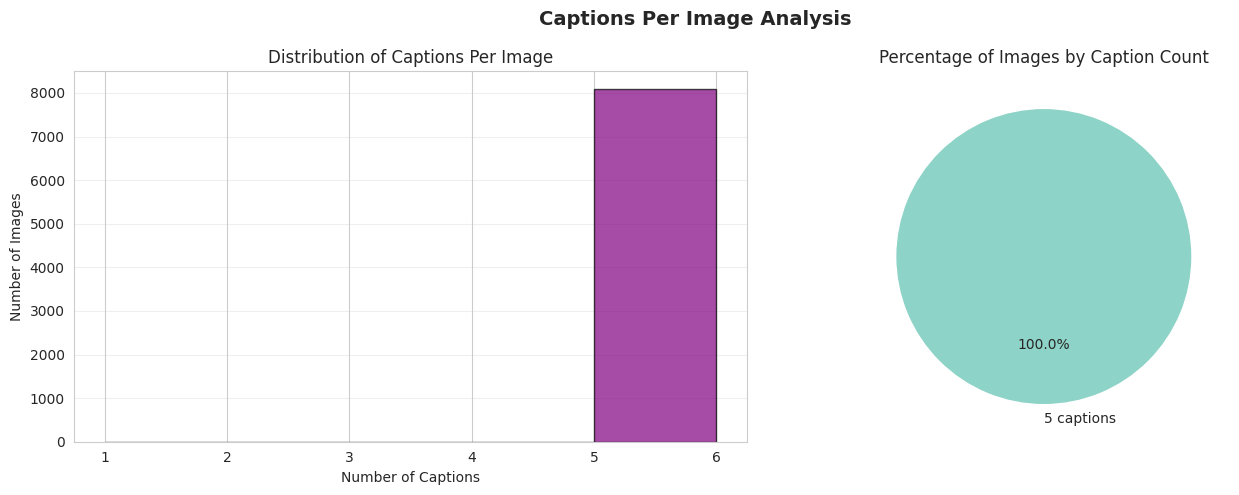

In [10]:
# =====================================================
# 5. CAPTIONS PER IMAGE DISTRIBUTION
# =====================================================
captions_per_image = [len(caps) for caps in captions.values()]

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('Captions Per Image Analysis', fontsize=14, fontweight='bold')

axes[0].hist(captions_per_image, bins=range(1, max(captions_per_image)+2), 
             color='purple', edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Number of Captions')
axes[0].set_ylabel('Number of Images')
axes[0].set_title('Distribution of Captions Per Image')
axes[0].grid(True, alpha=0.3, axis='y')

# Pie chart
caption_counts = Counter(captions_per_image)
labels = [f'{k} captions' for k in sorted(caption_counts.keys())]
sizes = [caption_counts[k] for k in sorted(caption_counts.keys())]
axes[1].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, 
            colors=plt.cm.Set3.colors)
axes[1].set_title('Percentage of Images by Caption Count')

plt.tight_layout()
plt.savefig(os.path.join(SAVE_DIR, "05_captions_per_image.png"), dpi=150, bbox_inches='tight')
plt.show()

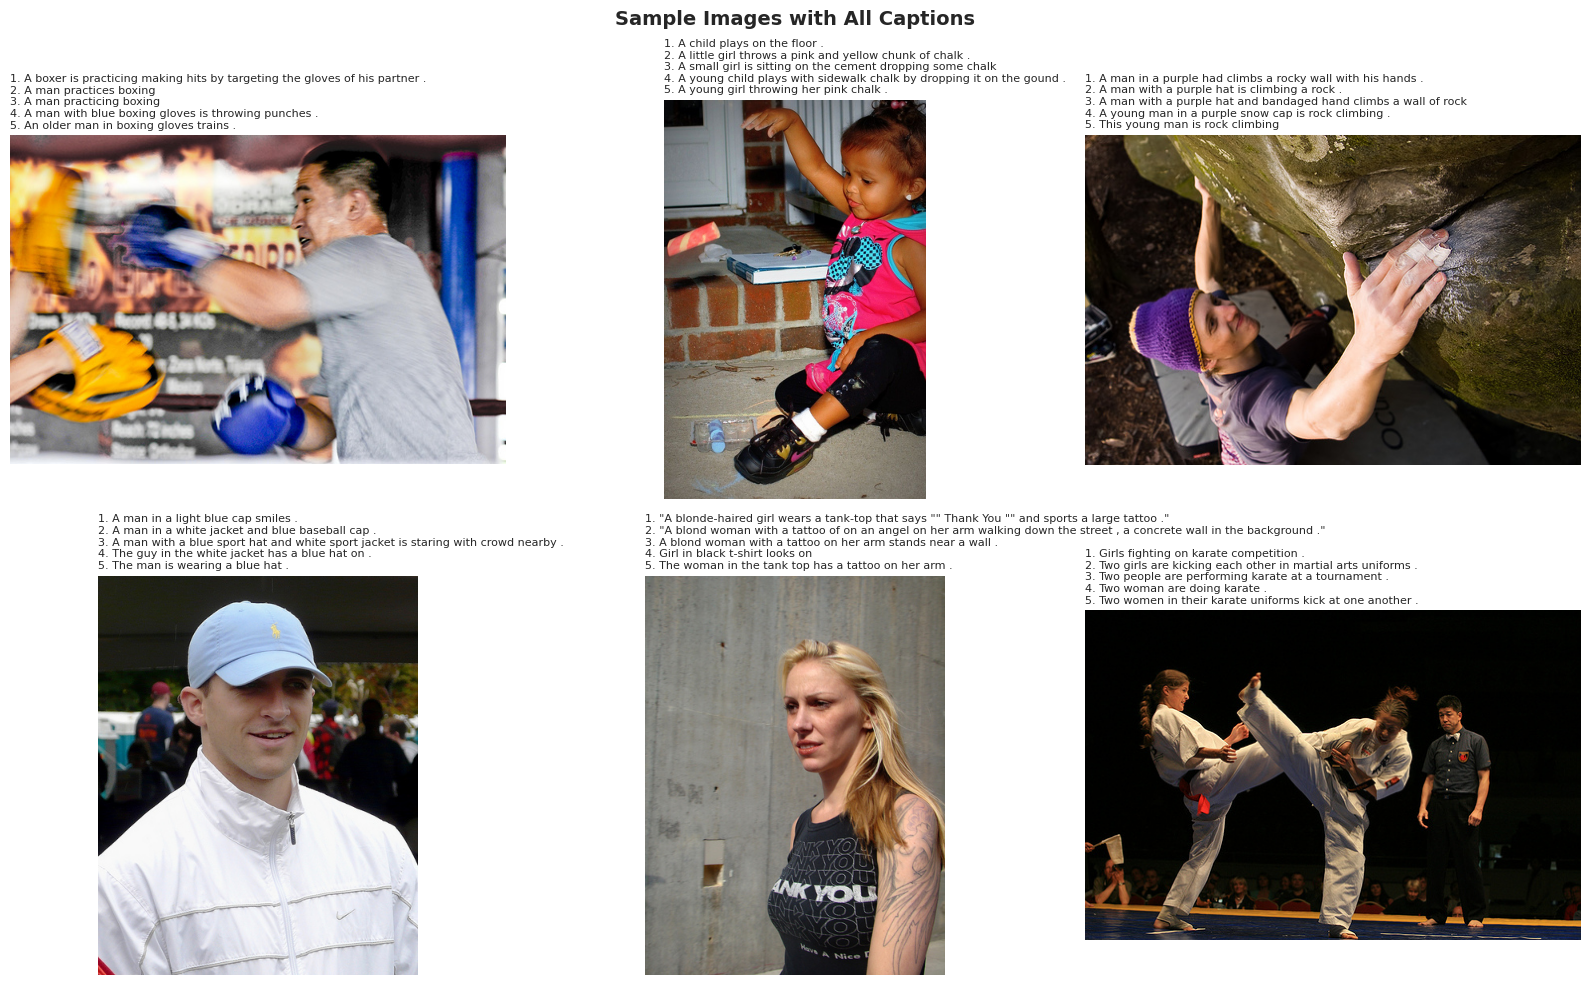


✓ EDA COMPLETE!
✓ All visualizations saved to: eda_results/

Generated files:
  01_sample_images.png
  02_image_dimensions.png
  03_caption_length_analysis.png
  04_vocabulary_analysis.png
  05_captions_per_image.png
  06_sample_with_captions.png


In [12]:
# =====================================================
# 6. SAMPLE CAPTIONS DISPLAY
# =====================================================
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle('Sample Images with All Captions', fontsize=14, fontweight='bold')

sample_images = random.sample(list(captions.keys()), min(6, len(captions)))

for ax, img_name in zip(axes.flat, sample_images):
    img_path = os.path.join(IMAGE_DIR, img_name)
    if os.path.exists(img_path):
        img = plt.imread(img_path)
        ax.imshow(img)
        ax.axis('off')
        
        # Show all captions
        all_caps = "\n".join([f"{i+1}. {cap}" for i, cap in enumerate(captions[img_name])])
        ax.set_title(all_caps, fontsize=8, loc='left', wrap=True)

plt.tight_layout()
plt.savefig(os.path.join(SAVE_DIR, "06_sample_with_captions.png"), dpi=150, bbox_inches='tight')
plt.show()

print("\n" + "="*60)
print("✓ EDA COMPLETE!")
print(f"✓ All visualizations saved to: {SAVE_DIR}/")
print("="*60)
print("\nGenerated files:")
print("  01_sample_images.png")
print("  02_image_dimensions.png")
print("  03_caption_length_analysis.png")
print("  04_vocabulary_analysis.png")
print("  05_captions_per_image.png")
print("  06_sample_with_captions.png")
print("="*60)

⚠️ Running in CPU-only mode
TensorFlow version: 2.20.0
Available devices: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]
GPU devices: []

Number of images in directory: 8091

=== Parsing captions file ===
✓ Total images with captions: 8091
✗ Malformed lines skipped: 0
✓ Total training samples: 40455

=== Setting up tokenizer ===
✓ Vocabulary size: 5000

=== Creating dataset ===
Verifying dataset shapes...
✓ Image shape: (32, 224, 224, 3)
✓ Caption input shape: (32, 19)
✓ Caption target shape: (32, 19)

=== Building model ===
Loading EfficientNetB0...


2026-01-10 17:07:46.393797: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


✓ CNN feature extractor created
Building full caption model...
✓ Model created with 10,495,275 parameters

=== Compiling model ===
✓ Model compiled

=== Training for 10 epochs ===
⚠️ Training on CPU (this will take longer)
   Estimated time: 30-60 minutes for 10 epochs
   You can reduce EPOCHS to 3-5 for faster testing

Epoch 1/10
1230/1265 ━━━━━━━━━━━━━━━━━━━━ 6:43 12s/step - accuracy: 0.6231 - loss: 2.3024 
Epoch 1: loss improved from None to 1.63877, saving model to model_checkpoints/best_caption_model.keras

Epoch 1: finished saving model to model_checkpoints/best_caption_model.keras
1265/1265 ━━━━━━━━━━━━━━━━━━━━ 637s 499ms/step - accuracy: 0.6977 - loss: 1.6388 - learning_rate: 0.0010
Epoch 2/10
1265/1265 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.7781 - loss: 0.9201 
Epoch 2: loss improved from 1.63877 to 0.84102, saving model to model_checkpoints/best_caption_model.keras

Epoch 2: finished saving model to model_checkpoints/best_caption_model.keras
1265/1265 ━━━━━━━━━━━━━━━━

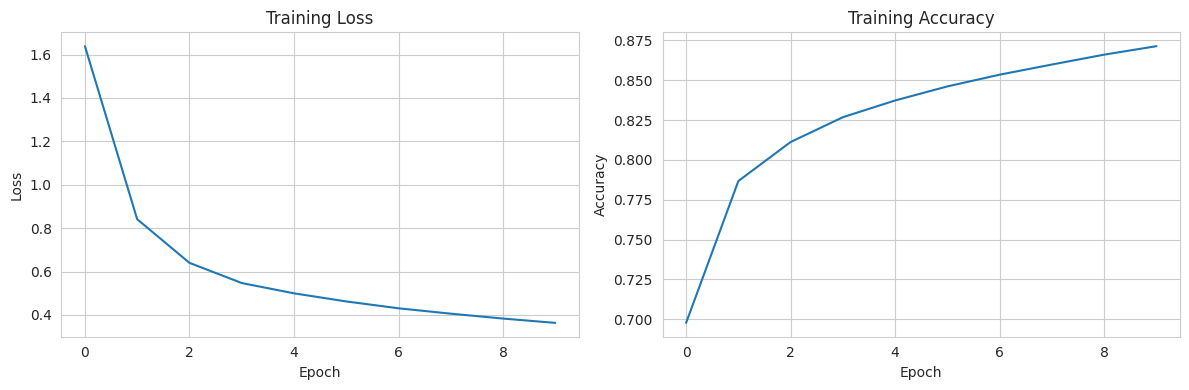


=== Testing caption generation ===

Image: 2249141510_f534708374.jpg
Generated: 

Image: 488196964_49159f11fd.jpg
Generated: 

Image: 880220939_0ef1c37f1f.jpg
Generated: 

Image: 3134586018_ae03ba20a0.jpg
Generated: 

Image: 146098876_0d99d7fb98.jpg
Generated: 

⚠️ NLTK not installed. Skipping BLEU evaluation.
Install with: pip install nltk

✓ TRAINING COMPLETE!
✓ Model saved to: model_checkpoints/best_caption_model.keras
✓ Training plot saved to: model_checkpoints/training_history.png

📝 To enable GPU in future:
   1. Upgrade TensorFlow: pip install --upgrade tensorflow[and-cuda]
   2. Restart Jupyter kernel
   3. Remove line: os.environ['CUDA_VISIBLE_DEVICES'] = '-1'


In [15]:
import os

# =====================================================
# CRITICAL: Disable GPU - Multiple methods
# =====================================================
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
os.environ["TF_FORCE_GPU_ALLOW_GROWTH"] = "false"

import random
import numpy as np
import tensorflow as tf

# Force CPU after import as well
tf.config.set_visible_devices([], 'GPU')

import matplotlib.pyplot as plt
from tensorflow.keras.layers import TextVectorization
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import layers, Model

print("⚠️ Running in CPU-only mode")
print(f"TensorFlow version: {tf.__version__}")
print(f"Available devices: {tf.config.list_physical_devices()}")
print(f"GPU devices: {tf.config.list_physical_devices('GPU')}")
print()

# =====================================================
# 2. CONFIGURATION
# =====================================================
IMAGE_DIR = "/home/kavir/image_project/Images"
CAPTIONS_FILE = "/home/kavir/image_project/captions.txt"
IMAGE_SIZE = (224, 224)
SEQ_LENGTH = 20
BATCH_SIZE = 32
VOCAB_SIZE = 5000
EMBED_DIM = 256
EPOCHS = 10
SAVE_DIR = "model_checkpoints"

if not os.path.exists(SAVE_DIR):
    os.makedirs(SAVE_DIR)

print(f"Number of images in directory: {len(os.listdir(IMAGE_DIR))}")

# =====================================================
# 3. LOAD AND PARSE CAPTIONS
# =====================================================
captions = {}
image_paths = []
caption_seqs = []

print("\n=== Parsing captions file ===")
malformed_count = 0

with open(CAPTIONS_FILE, "r", encoding="utf-8") as f:
    for line_num, line in enumerate(f, 1):
        line = line.strip()
        
        # Skip empty lines and header
        if not line or line.startswith("image,caption"):
            continue

        # Split by comma: "image.jpg,A dog running"
        parts = line.split(",", 1)
        if len(parts) < 2:
            malformed_count += 1
            continue

        img = parts[0].strip()
        cap = parts[1].strip()
        
        # Validate image filename
        if not img or not img.endswith(('.jpg', '.jpeg', '.png', '.JPG', '.JPEG', '.PNG')):
            malformed_count += 1
            continue
        
        # Skip empty captions
        if len(cap) == 0:
            continue

        captions.setdefault(img, []).append(cap)

print(f"✓ Total images with captions: {len(captions)}")
print(f"✗ Malformed lines skipped: {malformed_count}")

# Build parallel lists for dataset - ensure strings
for img, caps in captions.items():
    full_path = os.path.join(IMAGE_DIR, img)
    
    if not os.path.exists(full_path):
        print(f"⚠️ Skipping missing file: {img}")
        continue
    
    for c in caps:
        caption_seqs.append(str("sos " + c + " eos"))
        image_paths.append(str(full_path))

print(f"✓ Total training samples: {len(image_paths)}")

# =====================================================
# 4. IMAGE LOADING FUNCTION
# =====================================================
def load_image(path):
    img = tf.io.read_file(path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, IMAGE_SIZE)
    img = tf.cast(img, tf.float32) / 255.0
    return img

# =====================================================
# 5. TOKENIZER SETUP
# =====================================================
print("\n=== Setting up tokenizer ===")

tokenizer = TextVectorization(
    max_tokens=VOCAB_SIZE,
    output_sequence_length=SEQ_LENGTH,
    standardize="lower_and_strip_punctuation"
)

# Adapt tokenizer
adapt_dataset = tf.data.Dataset.from_tensor_slices(caption_seqs)
tokenizer.adapt(adapt_dataset)

vocab = tokenizer.get_vocabulary()
vocab_size = len(vocab)

print(f"✓ Vocabulary size: {vocab_size}")

# =====================================================
# 6. DATASET CREATION
# =====================================================
def make_dataset(imgs, caps):
    # Ensure paths are strings
    imgs = [str(p) for p in imgs]
    caps = [str(c) for c in caps]
    
    # Image loading
    img_ds = tf.data.Dataset.from_tensor_slices(imgs)
    img_ds = img_ds.map(load_image, num_parallel_calls=tf.data.AUTOTUNE)
    
    # Caption tokenization
    cap_ds = tf.data.Dataset.from_tensor_slices(caps)
    cap_ds = cap_ds.map(lambda x: tokenizer(x), num_parallel_calls=tf.data.AUTOTUNE)
    
    # Zip and batch
    dataset = tf.data.Dataset.zip((img_ds, cap_ds))
    dataset = dataset.batch(BATCH_SIZE)
    
    # Teacher forcing: input = [0:N-1], target = [1:N]
    def process_input_target(img, cap):
        return (img, cap[:, :-1]), cap[:, 1:]

    return dataset.map(process_input_target).prefetch(tf.data.AUTOTUNE)

print("\n=== Creating dataset ===")
dataset = make_dataset(image_paths, caption_seqs)

# Verify shapes
print("Verifying dataset shapes...")
for (img, cap_in), cap_out in dataset.take(1):
    print(f"✓ Image shape: {img.shape}")
    print(f"✓ Caption input shape: {cap_in.shape}")
    print(f"✓ Caption target shape: {cap_out.shape}")

# =====================================================
# 7. MODEL ARCHITECTURE
# =====================================================
print("\n=== Building model ===")

# CNN Feature Extractor
print("Loading EfficientNetB0...")
cnn = EfficientNetB0(include_top=False, weights="imagenet", input_shape=(224, 224, 3))
cnn.trainable = False

# Create CNN model wrapper
cnn_input = layers.Input(shape=(224, 224, 3))
cnn_features = cnn(cnn_input)
cnn_reshaped = layers.Reshape((-1, 1280))(cnn_features)
cnn_model = Model(cnn_input, cnn_reshaped, name="cnn_feature_extractor")

print("✓ CNN feature extractor created")

# Transformer Encoder
class TransformerEncoder(layers.Layer):
    def __init__(self, embed_dim, num_heads=4, ff_dim=256, **kwargs):
        super().__init__(**kwargs)
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = tf.keras.Sequential([
            layers.Dense(ff_dim, activation="relu"),
            layers.Dense(embed_dim)
        ])
        self.norm1 = layers.LayerNormalization(epsilon=1e-6)
        self.norm2 = layers.LayerNormalization(epsilon=1e-6)

    def call(self, inputs):
        attn_output = self.att(inputs, inputs)
        out1 = self.norm1(inputs + attn_output)
        return self.norm2(out1 + self.ffn(out1))

# Transformer Decoder
class TransformerDecoder(layers.Layer):
    def __init__(self, vocab_size, embed_dim, num_heads=4, ff_dim=512, **kwargs):
        super().__init__(**kwargs)
        self.embed = layers.Embedding(vocab_size, embed_dim)
        self.att1 = layers.MultiHeadAttention(num_heads, embed_dim)
        self.att2 = layers.MultiHeadAttention(num_heads, embed_dim)
        self.ffn = tf.keras.Sequential([
            layers.Dense(ff_dim, activation="relu"),
            layers.Dense(embed_dim)
        ])
        self.norm1 = layers.LayerNormalization()
        self.norm2 = layers.LayerNormalization()
        self.norm3 = layers.LayerNormalization()
        self.out = layers.Dense(vocab_size)

    def call(self, x, enc_output):
        x = self.embed(x)
        x = self.norm1(x + self.att1(x, x))
        x = self.norm2(x + self.att2(x, enc_output))
        x = self.norm3(x + self.ffn(x))
        return self.out(x)

# Build full model
print("Building full caption model...")
img_input = layers.Input(shape=(224, 224, 3), name="image_input")
cap_input = layers.Input(shape=(None,), dtype=tf.int64, name="caption_input")

# Extract features
cnn_features = cnn_model(img_input)
x = layers.Dense(EMBED_DIM)(cnn_features)

# Encode and decode
encoder_output = TransformerEncoder(embed_dim=EMBED_DIM)(x)
outputs = TransformerDecoder(vocab_size, EMBED_DIM)(cap_input, encoder_output)

model = Model([img_input, cap_input], outputs, name="image_captioning_model")

print(f"✓ Model created with {model.count_params():,} parameters")

# =====================================================
# 8. COMPILE MODEL
# =====================================================
print("\n=== Compiling model ===")
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"]
)
print("✓ Model compiled")

# =====================================================
# 9. CALLBACKS
# =====================================================
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath=os.path.join(SAVE_DIR, "best_caption_model.keras"),
    save_best_only=True,
    monitor="loss",
    verbose=1
)

early_stop = tf.keras.callbacks.EarlyStopping(
    monitor="loss",
    patience=3,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor="loss",
    factor=0.5,
    patience=2,
    verbose=1
)

# =====================================================
# 10. TRAIN MODEL
# =====================================================
print(f"\n=== Training for {EPOCHS} epochs ===")
print("⚠️ Training on CPU (this will take longer)")
print("   Estimated time: 30-60 minutes for 10 epochs")
print("   You can reduce EPOCHS to 3-5 for faster testing\n")

history = model.fit(
    dataset,
    epochs=EPOCHS,
    callbacks=[checkpoint, early_stop, reduce_lr],
    verbose=1
)

# =====================================================
# 11. PLOT TRAINING HISTORY
# =====================================================
print("\n=== Plotting training history ===")
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history["loss"])
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"])
plt.title("Training Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(True)

plt.tight_layout()
plt.savefig(os.path.join(SAVE_DIR, "training_history.png"))
plt.show()

# =====================================================
# 12. CAPTION GENERATION FUNCTION
# =====================================================
def generate_caption(image_path, max_length=20):
    """Generate caption for a single image"""
    img = load_image(image_path)
    img = tf.expand_dims(img, 0)

    caption = "sos"
    for _ in range(max_length):
        seq = tokenizer([caption])
        preds = model([img, seq], training=False)
        word_id = tf.argmax(preds[0, -1]).numpy()
        word = vocab[word_id]
        
        if word == "eos" or word == "[UNK]":
            break
        
        caption += " " + word
    
    return caption.replace("sos ", "").strip()

# =====================================================
# 13. TEST CAPTION GENERATION
# =====================================================
print("\n=== Testing caption generation ===")
test_samples = random.sample(image_paths, min(5, len(image_paths)))

for img_path in test_samples:
    generated = generate_caption(img_path)
    print(f"\nImage: {os.path.basename(img_path)}")
    print(f"Generated: {generated}")

# =====================================================
# 14. EVALUATE WITH BLEU SCORES (Optional)
# =====================================================
try:
    from nltk.translate.bleu_score import corpus_bleu
    
    print("\n=== Calculating BLEU scores ===")
    references = []
    predictions = []
    
    # Evaluate on subset (100 images)
    eval_items = list(captions.items())[:100]
    
    for img, caps in eval_items:
        img_path = os.path.join(IMAGE_DIR, img)
        if not os.path.exists(img_path):
            continue
            
        pred = generate_caption(img_path)
        predictions.append(pred.split())
        references.append([c.split() for c in caps])
    
    bleu1 = corpus_bleu(references, predictions, weights=(1, 0, 0, 0))
    bleu2 = corpus_bleu(references, predictions, weights=(0.5, 0.5, 0, 0))
    bleu3 = corpus_bleu(references, predictions, weights=(0.33, 0.33, 0.33, 0))
    bleu4 = corpus_bleu(references, predictions, weights=(0.25, 0.25, 0.25, 0.25))
    
    print(f"BLEU-1: {bleu1:.4f}")
    print(f"BLEU-2: {bleu2:.4f}")
    print(f"BLEU-3: {bleu3:.4f}")
    print(f"BLEU-4: {bleu4:.4f}")
    
except ImportError:
    print("\n⚠️ NLTK not installed. Skipping BLEU evaluation.")
    print("Install with: pip install nltk")

print("\n" + "="*60)
print("✓ TRAINING COMPLETE!")
print(f"✓ Model saved to: {os.path.join(SAVE_DIR, 'best_caption_model.keras')}")
print(f"✓ Training plot saved to: {os.path.join(SAVE_DIR, 'training_history.png')}")
print("\n📝 To enable GPU in future:")
print("   1. Upgrade TensorFlow: pip install --upgrade tensorflow[and-cuda]")
print("   2. Restart Jupyter kernel")
print("   3. Remove line: os.environ['CUDA_VISIBLE_DEVICES'] = '-1'")
print("="*60)

✓ Saved comprehensive training dashboard to: model_checkpoints/training_metrics_dashboard.png


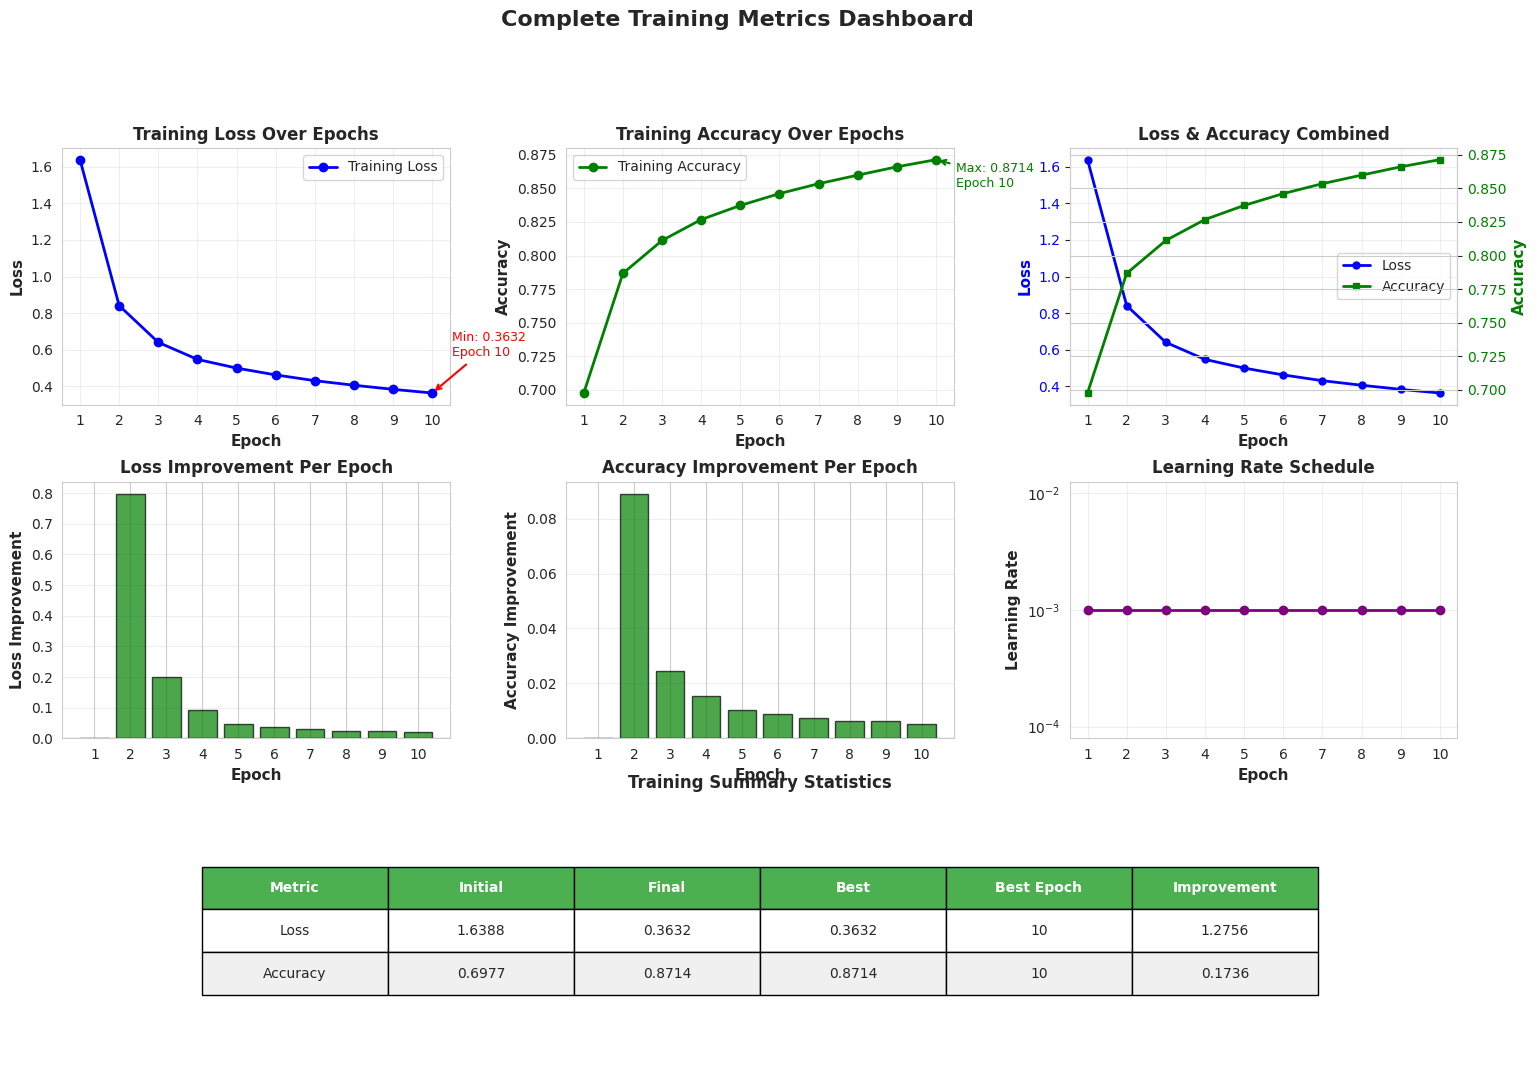

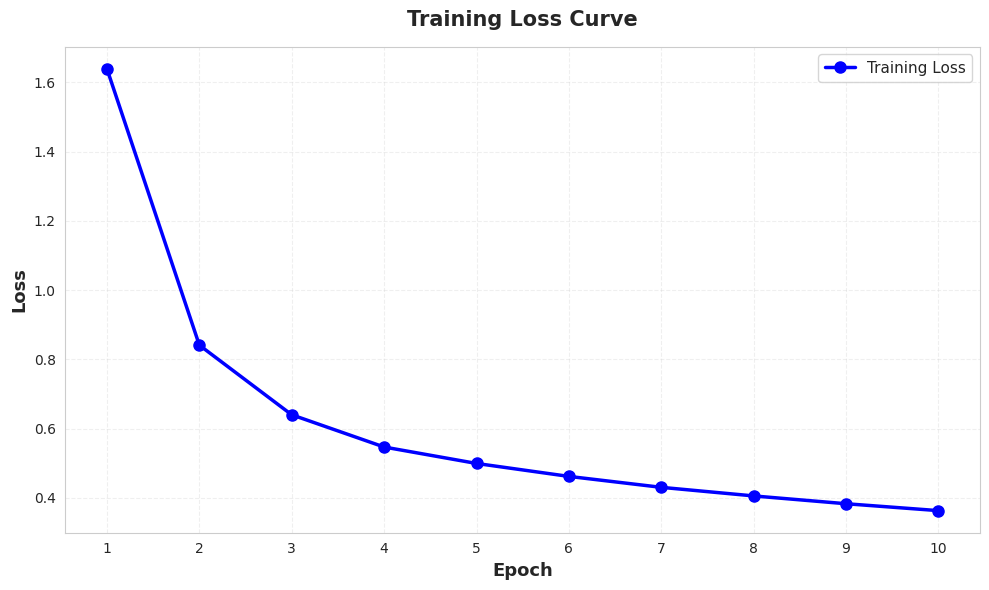

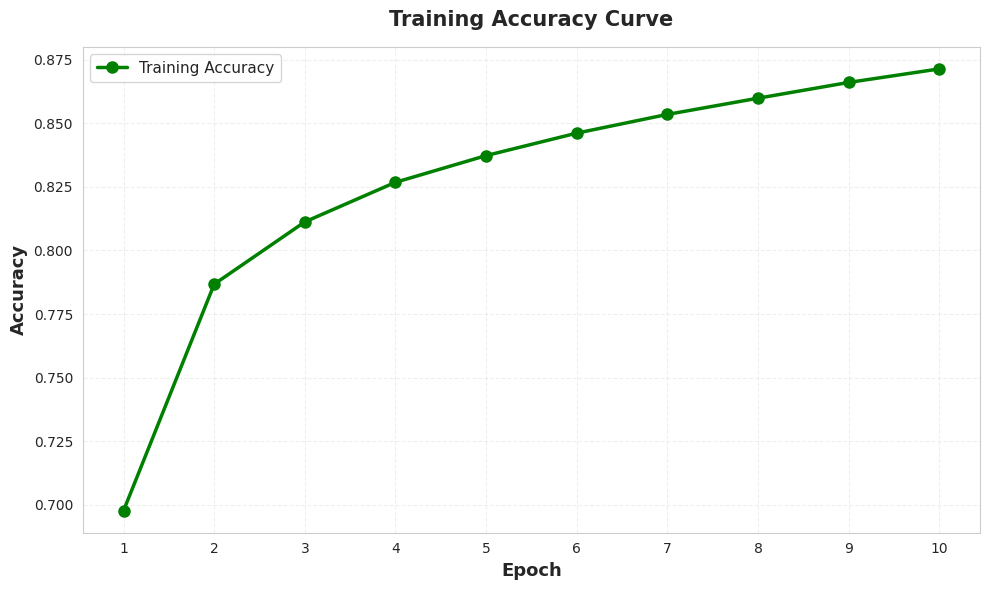


✓ ALL TRAINING VISUALIZATIONS COMPLETE!
Generated files:
  - training_metrics_dashboard.png (comprehensive)
  - loss_curve.png (high-resolution)
  - accuracy_curve.png (high-resolution)


In [16]:
# =====================================================
# TRAINING METRICS VISUALIZATION
# Run this AFTER your model has finished training
# =====================================================

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

sns.set_style("whitegrid")

# =====================================================
# ASSUMING YOU HAVE THE 'history' OBJECT FROM TRAINING
# If not, you can load it from saved model or recreate
# =====================================================

# Extract metrics from history
# Replace 'history' with your actual training history object
loss = history.history['loss']
accuracy = history.history['accuracy']

# If you have validation data (optional)
# val_loss = history.history.get('val_loss', None)
# val_accuracy = history.history.get('val_accuracy', None)

epochs_range = range(1, len(loss) + 1)

# =====================================================
# CREATE COMPREHENSIVE TRAINING PLOTS
# =====================================================

fig = plt.figure(figsize=(18, 12))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# =====================================================
# 1. TRAINING LOSS
# =====================================================
ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(epochs_range, loss, 'b-o', linewidth=2, markersize=6, label='Training Loss')
# if val_loss:
#     ax1.plot(epochs_range, val_loss, 'r-s', linewidth=2, markersize=6, label='Validation Loss')
ax1.set_xlabel('Epoch', fontsize=11, fontweight='bold')
ax1.set_ylabel('Loss', fontsize=11, fontweight='bold')
ax1.set_title('Training Loss Over Epochs', fontsize=12, fontweight='bold')
ax1.legend(loc='best')
ax1.grid(True, alpha=0.3)
ax1.set_xticks(epochs_range)

# Add min loss annotation
min_loss_epoch = np.argmin(loss) + 1
min_loss_value = np.min(loss)
ax1.annotate(f'Min: {min_loss_value:.4f}\nEpoch {min_loss_epoch}',
             xy=(min_loss_epoch, min_loss_value),
             xytext=(min_loss_epoch + 0.5, min_loss_value + 0.2),
             arrowprops=dict(arrowstyle='->', color='red', lw=1.5),
             fontsize=9, color='red')

# =====================================================
# 2. TRAINING ACCURACY
# =====================================================
ax2 = fig.add_subplot(gs[0, 1])
ax2.plot(epochs_range, accuracy, 'g-o', linewidth=2, markersize=6, label='Training Accuracy')
# if val_accuracy:
#     ax2.plot(epochs_range, val_accuracy, 'orange', linewidth=2, markersize=6, label='Validation Accuracy')
ax2.set_xlabel('Epoch', fontsize=11, fontweight='bold')
ax2.set_ylabel('Accuracy', fontsize=11, fontweight='bold')
ax2.set_title('Training Accuracy Over Epochs', fontsize=12, fontweight='bold')
ax2.legend(loc='best')
ax2.grid(True, alpha=0.3)
ax2.set_xticks(epochs_range)

# Add max accuracy annotation
max_acc_epoch = np.argmax(accuracy) + 1
max_acc_value = np.max(accuracy)
ax2.annotate(f'Max: {max_acc_value:.4f}\nEpoch {max_acc_epoch}',
             xy=(max_acc_epoch, max_acc_value),
             xytext=(max_acc_epoch + 0.5, max_acc_value - 0.02),
             arrowprops=dict(arrowstyle='->', color='green', lw=1.5),
             fontsize=9, color='green')

# =====================================================
# 3. LOSS & ACCURACY COMBINED
# =====================================================
ax3 = fig.add_subplot(gs[0, 2])
ax3_twin = ax3.twinx()

line1 = ax3.plot(epochs_range, loss, 'b-o', linewidth=2, markersize=5, label='Loss')
line2 = ax3_twin.plot(epochs_range, accuracy, 'g-s', linewidth=2, markersize=5, label='Accuracy')

ax3.set_xlabel('Epoch', fontsize=11, fontweight='bold')
ax3.set_ylabel('Loss', fontsize=11, fontweight='bold', color='blue')
ax3_twin.set_ylabel('Accuracy', fontsize=11, fontweight='bold', color='green')
ax3.set_title('Loss & Accuracy Combined', fontsize=12, fontweight='bold')
ax3.tick_params(axis='y', labelcolor='blue')
ax3_twin.tick_params(axis='y', labelcolor='green')
ax3.grid(True, alpha=0.3)
ax3.set_xticks(epochs_range)

lines = line1 + line2
labels = [l.get_label() for l in lines]
ax3.legend(lines, labels, loc='center right')

# =====================================================
# 4. LOSS IMPROVEMENT PER EPOCH
# =====================================================
ax4 = fig.add_subplot(gs[1, 0])
loss_improvement = [0] + [loss[i-1] - loss[i] for i in range(1, len(loss))]
colors = ['green' if x > 0 else 'red' for x in loss_improvement]
ax4.bar(epochs_range, loss_improvement, color=colors, alpha=0.7, edgecolor='black')
ax4.axhline(0, color='black', linewidth=0.8)
ax4.set_xlabel('Epoch', fontsize=11, fontweight='bold')
ax4.set_ylabel('Loss Improvement', fontsize=11, fontweight='bold')
ax4.set_title('Loss Improvement Per Epoch', fontsize=12, fontweight='bold')
ax4.grid(True, alpha=0.3, axis='y')
ax4.set_xticks(epochs_range)

# =====================================================
# 5. ACCURACY IMPROVEMENT PER EPOCH
# =====================================================
ax5 = fig.add_subplot(gs[1, 1])
acc_improvement = [0] + [accuracy[i] - accuracy[i-1] for i in range(1, len(accuracy))]
colors = ['green' if x > 0 else 'red' for x in acc_improvement]
ax5.bar(epochs_range, acc_improvement, color=colors, alpha=0.7, edgecolor='black')
ax5.axhline(0, color='black', linewidth=0.8)
ax5.set_xlabel('Epoch', fontsize=11, fontweight='bold')
ax5.set_ylabel('Accuracy Improvement', fontsize=11, fontweight='bold')
ax5.set_title('Accuracy Improvement Per Epoch', fontsize=12, fontweight='bold')
ax5.grid(True, alpha=0.3, axis='y')
ax5.set_xticks(epochs_range)

# =====================================================
# 6. LEARNING RATE (if using ReduceLROnPlateau)
# =====================================================
ax6 = fig.add_subplot(gs[1, 2])
# If you have learning rate history from callback
# lr_history = [callback info or extract from optimizer]
# For demonstration, let's create a sample
lr_values = [0.001] * len(loss)  # Replace with actual LR values if available
ax6.plot(epochs_range, lr_values, 'purple', linewidth=2, marker='o', markersize=6)
ax6.set_xlabel('Epoch', fontsize=11, fontweight='bold')
ax6.set_ylabel('Learning Rate', fontsize=11, fontweight='bold')
ax6.set_title('Learning Rate Schedule', fontsize=12, fontweight='bold')
ax6.set_yscale('log')
ax6.grid(True, alpha=0.3)
ax6.set_xticks(epochs_range)

# =====================================================
# 7. TRAINING METRICS SUMMARY TABLE
# =====================================================
ax7 = fig.add_subplot(gs[2, :])
ax7.axis('off')

# Create summary statistics
summary_data = [
    ['Metric', 'Initial', 'Final', 'Best', 'Best Epoch', 'Improvement'],
    ['Loss', f'{loss[0]:.4f}', f'{loss[-1]:.4f}', f'{min(loss):.4f}', 
     f'{np.argmin(loss)+1}', f'{loss[0]-loss[-1]:.4f}'],
    ['Accuracy', f'{accuracy[0]:.4f}', f'{accuracy[-1]:.4f}', f'{max(accuracy):.4f}', 
     f'{np.argmax(accuracy)+1}', f'{accuracy[-1]-accuracy[0]:.4f}'],
]

table = ax7.table(cellText=summary_data, cellLoc='center', loc='center',
                  bbox=[0.1, 0.3, 0.8, 0.5])
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2)

# Style header row
for i in range(6):
    table[(0, i)].set_facecolor('#4CAF50')
    table[(0, i)].set_text_props(weight='bold', color='white')

# Style data rows
for i in range(1, 3):
    for j in range(6):
        if i % 2 == 0:
            table[(i, j)].set_facecolor('#f0f0f0')
        else:
            table[(i, j)].set_facecolor('#ffffff')

ax7.set_title('Training Summary Statistics', fontsize=12, fontweight='bold', pad=20)

plt.suptitle('Complete Training Metrics Dashboard', fontsize=16, fontweight='bold', y=0.995)

# Save figure
save_path = os.path.join('model_checkpoints', 'training_metrics_dashboard.png')
plt.savefig(save_path, dpi=150, bbox_inches='tight')
print(f"✓ Saved comprehensive training dashboard to: {save_path}")
plt.show()

# =====================================================
# ADDITIONAL: Individual High-Resolution Plots
# =====================================================

# Loss curve (high-res)
plt.figure(figsize=(10, 6))
plt.plot(epochs_range, loss, 'b-o', linewidth=2.5, markersize=8, label='Training Loss')
plt.xlabel('Epoch', fontsize=13, fontweight='bold')
plt.ylabel('Loss', fontsize=13, fontweight='bold')
plt.title('Training Loss Curve', fontsize=15, fontweight='bold', pad=15)
plt.grid(True, alpha=0.3, linestyle='--')
plt.legend(fontsize=11)
plt.xticks(epochs_range)
plt.tight_layout()
plt.savefig(os.path.join('model_checkpoints', 'loss_curve.png'), dpi=200)
plt.show()

# Accuracy curve (high-res)
plt.figure(figsize=(10, 6))
plt.plot(epochs_range, accuracy, 'g-o', linewidth=2.5, markersize=8, label='Training Accuracy')
plt.xlabel('Epoch', fontsize=13, fontweight='bold')
plt.ylabel('Accuracy', fontsize=13, fontweight='bold')
plt.title('Training Accuracy Curve', fontsize=15, fontweight='bold', pad=15)
plt.grid(True, alpha=0.3, linestyle='--')
plt.legend(fontsize=11)
plt.xticks(epochs_range)
plt.tight_layout()
plt.savefig(os.path.join('model_checkpoints', 'accuracy_curve.png'), dpi=200)
plt.show()

print("\n" + "="*60)
print("✓ ALL TRAINING VISUALIZATIONS COMPLETE!")
print("="*60)
print("Generated files:")
print("  - training_metrics_dashboard.png (comprehensive)")
print("  - loss_curve.png (high-resolution)")
print("  - accuracy_curve.png (high-resolution)")
print("="*60)